In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time

Tire Demand Data

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [7]:
import pandas as pd


tire_demand = pd.read_csv('dataset.csv', parse_dates=[0], index_col=0).squeeze()


tire_demand.index = pd.to_datetime(tire_demand.index)


if isinstance(tire_demand, pd.DataFrame) and tire_demand.shape[1] == 1:
    tire_demand = tire_demand.squeeze()

print(tire_demand.head())  

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
Name: Total, dtype: int64


In [9]:
tire_demand = tire_demand.asfreq(pd.infer_freq(tire_demand.index))

In [14]:
start_date = datetime(2000,1,1)
end_date = datetime(2004,1,1)
lim_tire_demand = tire_demand[start_date:end_date]

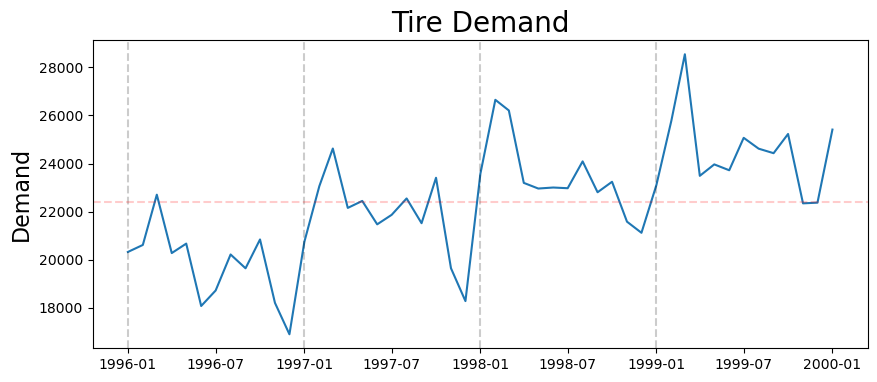

In [101]:
plt.figure(figsize=(10,4))
plt.plot(lim_tire_demand)
plt.title('Tire Demand', fontsize=20)
plt.ylabel('Demand', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(lim_tire_demand.mean(), color='r', alpha=0.2, linestyle='--')

In [16]:
first_diff = lim_tire_demand.diff()[1:]

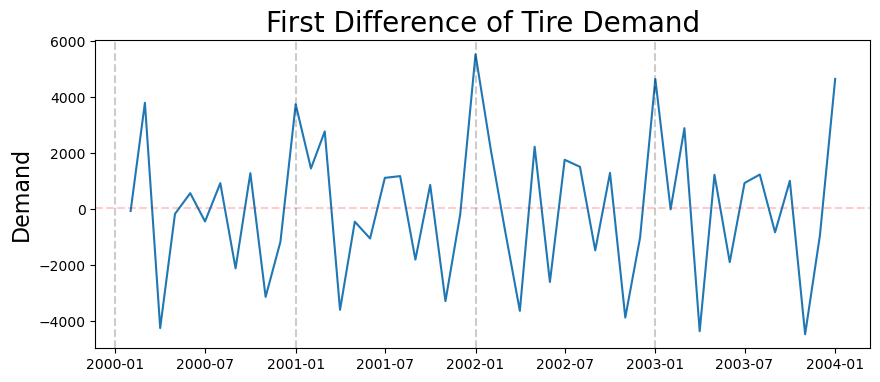

In [17]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('First Difference of Tire Demand', fontsize=20)
plt.ylabel('Demand', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff.mean(), color='r', alpha=0.2, linestyle='--')

ACF

<BarContainer object of 20 artists>

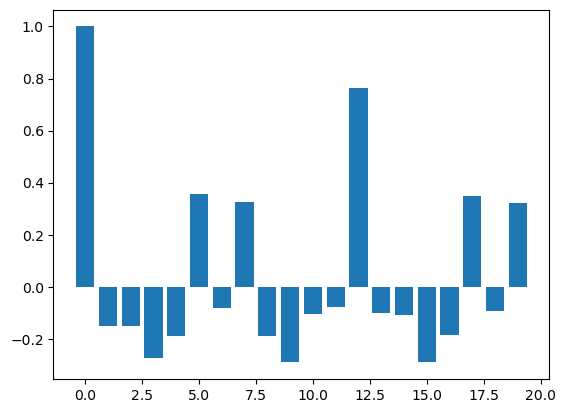

In [25]:
acf_vals = acf(first_diff)
plt.bar(range(num_lags), acf_vals[:num_lags])

Based on ACF, we start with a MA(1)

PACF

<BarContainer object of 15 artists>

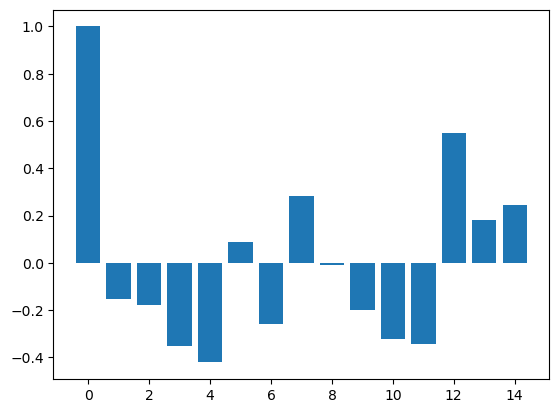

In [32]:
pacf_vals = pacf(first_diff)
plt.bar(range(num_lags), pacf_vals[:num_lags])

Based on PACF, we start with a AR(4)

Training and Testing Data

In [33]:
train_end = datetime(2003,7,1)
test_end = datetime(2004,1,1)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming train_data is already defined and contains the time series training data

# Define and fit the ARIMA model
model = ARIMA(train_data, order=(4, 1, 0))  # Note that ARIMA(p, d, q) includes AR and MA terms
fitted_model = model.fit()
model_fit = model.fit()

# Print the model summary
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  210
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -1874.281
Date:                Tue, 25 Jun 2024   AIC                           3758.562
Time:                        12:02:22   BIC                           3775.273
Sample:                    02-01-1986   HQIC                          3765.318
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8363      0.072    -11.575      0.000      -0.978      -0.695
ar.L2         -0.6426      0.070     -9.163      0.000      -0.780      -0.505
ar.L3         -0.6620      0.071     -9.306      0.0

In [39]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [40]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

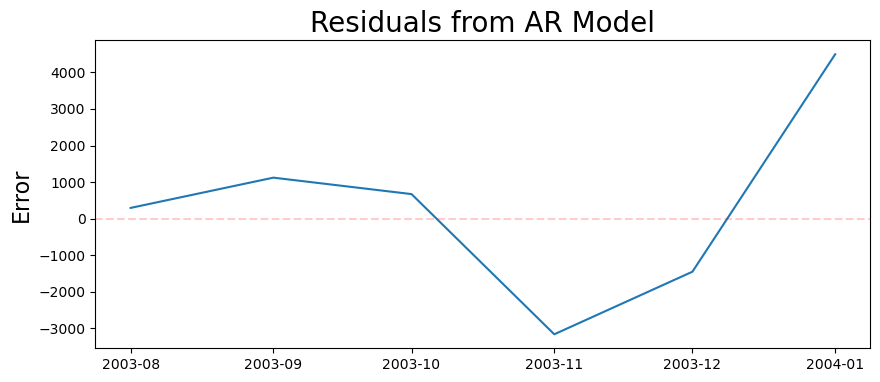

In [41]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

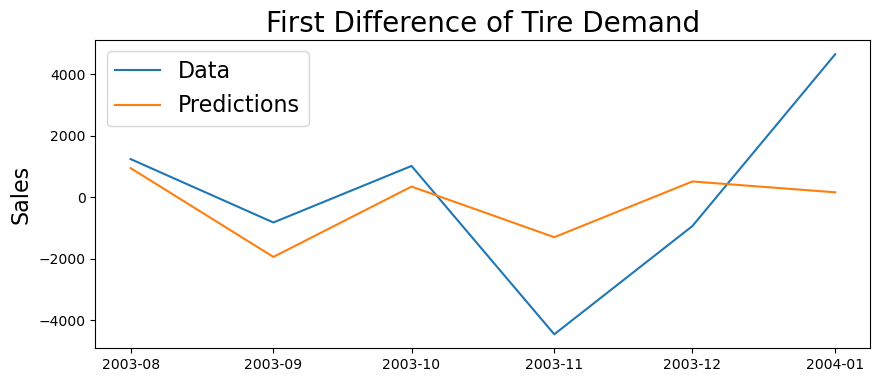

In [43]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Tire Demand', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [44]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 2383.690068757849


In [48]:
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100


mad = np.mean(np.abs(test_data - predictions))


mse = np.mean((test_data - predictions) ** 2)

print('Mean Absolute Percentage Error (MAPE):', mape)
print('Mean Absolute Deviation (MAD):', mad)
print('Mean Squared Error (MSE):', mse)

Mean Absolute Percentage Error (MAPE): 91.48518374896159
Mean Absolute Deviation (MAD): 1865.4864206483337
Mean Squared Error (MSE): 5681978.343894798


In [49]:
%reset -f


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [51]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [52]:
import pandas as pd


tire_demand = pd.read_csv('dataset.csv', parse_dates=[0], index_col=0).squeeze()


tire_demand.index = pd.to_datetime(tire_demand.index)


if isinstance(tire_demand, pd.DataFrame) and tire_demand.shape[1] == 1:
    tire_demand = tire_demand.squeeze()

print(tire_demand.head())  # Optional: to verify the loaded data


Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
Name: Total, dtype: int64


In [53]:
tire_demand = tire_demand.asfreq(pd.infer_freq(tire_demand.index))

In [55]:
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_tire_demand = tire_demand[start_date:end_date]

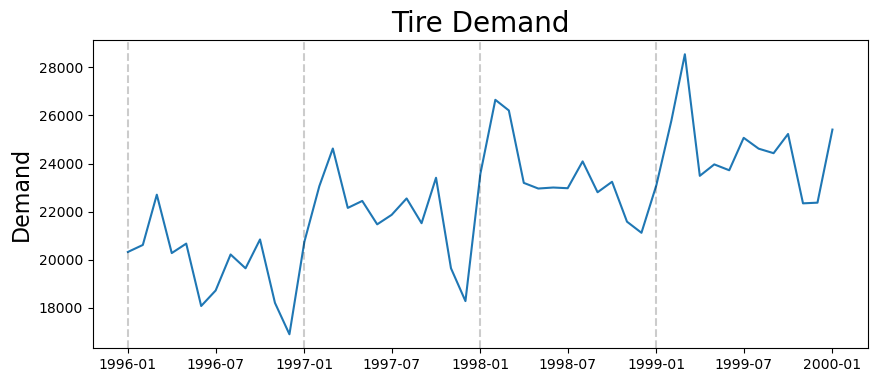

In [58]:
plt.figure(figsize=(10,4))
plt.plot(lim_tire_demand)
plt.title('Tire Demand', fontsize=20)
plt.ylabel('Demand', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [60]:
first_diff = lim_tire_demand.diff()[1:]

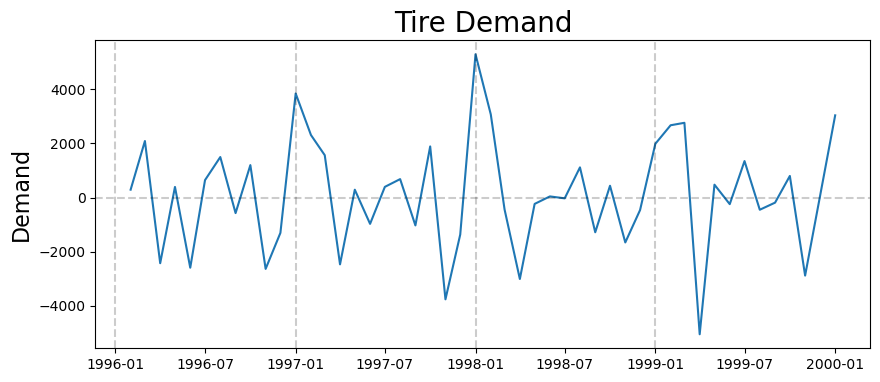

In [61]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Tire Demand', fontsize=20)
plt.ylabel('Demand', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

ACF

<BarContainer object of 20 artists>

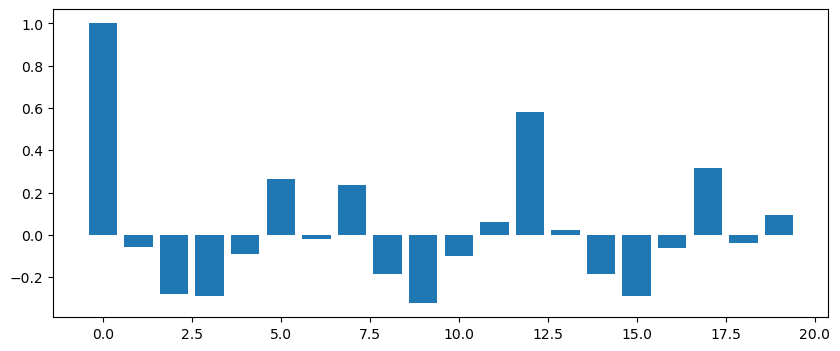

In [68]:
from statsmodels.tsa.stattools import acf


acf_vals = acf(first_diff, nlags=20) 

# Number of lags to plot
num_lags = min(20, len(acf_vals)) 

# Plot ACF values for the determined number of lags
plt.figure(figsize=(10, 4))
plt.bar(range(num_lags), acf_vals[:num_lags])



Based on ACF, we start with a seasonal MA process

PACF

<BarContainer object of 15 artists>

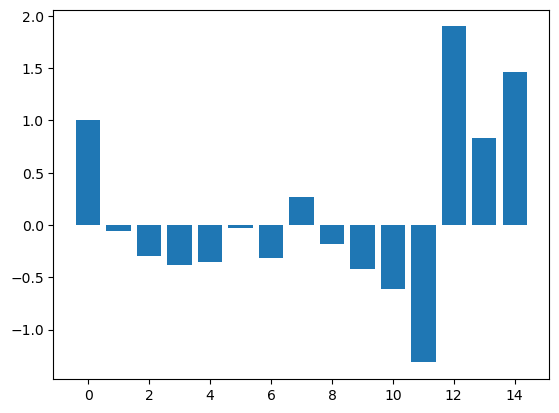

In [69]:
pacf_vals = pacf(first_diff)
num_lags = 15
plt.bar(range(num_lags), pacf_vals[:num_lags])

Based on PACF, we start with a seasonal AR process

Training and Testing Data

In [70]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

train_data = lim_tire_demand[:train_end]
test_data = lim_tire_demand[train_end + timedelta(days=1):test_end]

Fit the SARIMA Model

In [71]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

In [72]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.87216D+00    |proj g|=  1.21435D+00

At iterate    5    f=  8.58478D+00    |proj g|=  3.02739D-01

At iterate   10    f=  8.55804D+00    |proj g|=  1.37587D-03

At iterate   15    f=  8.55804D+00    |proj g|=  1.03638D-03

At iterate   20    f=  8.55788D+00    |proj g|=  2.65911D-02

At iterate   25    f=  8.53999D+00    |proj g|=  1.21560D-01

At iterate   30    f=  8.51126D+00    |proj g|=  1.53723D-02

At iterate   35    f=  8.50388D+00    |proj g|=  4.28783D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/sam/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/sam/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


In [73]:
#summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Total   No. Observations:                   43
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -365.635
Date:                              Tue, 25 Jun 2024   AIC                            737.269
Time:                                      12:21:44   BIC                            742.482
Sample:                                  01-01-1996   HQIC                           739.180
                                       - 07-01-1999                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8250      0.120      6.847      0.000       0.589       1.061
ma.S.L12      -0.51

In [74]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

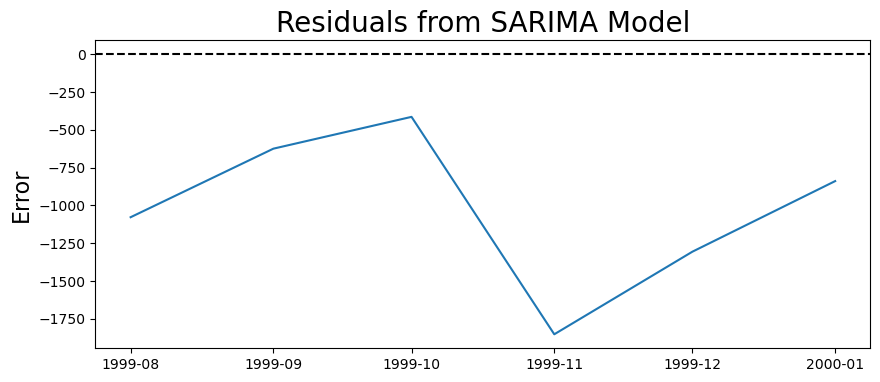

In [75]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

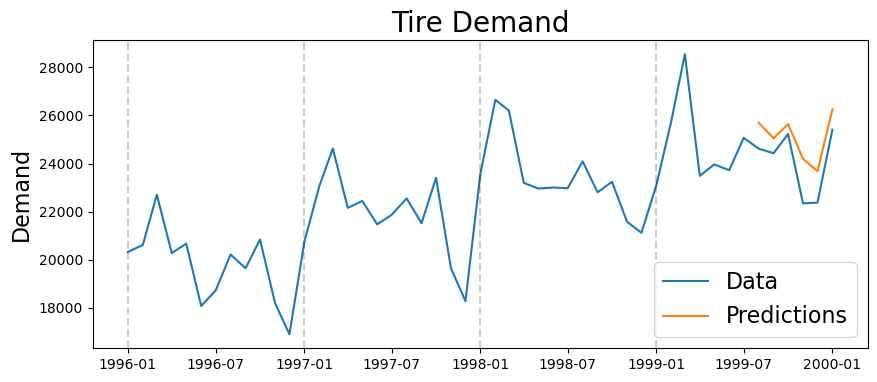

In [96]:
plt.figure(figsize=(10,4))

plt.plot(lim_tire_demand)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Tire Demand', fontsize=20)
plt.ylabel('Demand', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [77]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))


Root Mean Squared Error: 1122.3059057014739


In [78]:
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100


mad = np.mean(np.abs(test_data - predictions))


mse = np.mean((test_data - predictions) ** 2)

print('Mean Absolute Percentage Error (MAPE):', mape)
print('Mean Absolute Deviation (MAD):', mad)
print('Mean Squared Error (MSE):', mse)

Mean Absolute Percentage Error (MAPE): 4.332277528619242
Mean Absolute Deviation (MAD): 1018.5085666432715
Mean Squared Error (MSE): 1259570.5459724055


Using the Rolling Forecast Origin

In [79]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_tire_demand[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/Users/sam/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/sam/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/Users/sam/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/sam/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting sea

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.87216D+00    |proj g|=  1.21435D+00

At iterate    5    f=  8.58478D+00    |proj g|=  3.02739D-01

At iterate   10    f=  8.55804D+00    |proj g|=  1.37587D-03

At iterate   15    f=  8.55804D+00    |proj g|=  1.03638D-03

At iterate   20    f=  8.55788D+00    |proj g|=  2.65911D-02

At iterate   25    f=  8.53999D+00    |proj g|=  1.21560D-01

At iterate   30    f=  8.51126D+00    |proj g|=  1.53723D-02

At iterate   35    f=  8.50388D+00    |proj g|=  4.28783D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/var/folders/_7/97j6hq_s0jlgp2fbykjf38vw0000gn/T/ipykernel_68320/587558994.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/Users/sam/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/var/folders/_7/97j6hq_s0jlgp2fbykjf38vw0000gn/T/ipykernel_68320/587558994.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/Users/sam/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  

At iterate    5    f=  8.51738D+00    |proj g|=  1.61913D-01

At iterate   10    f=  8.49342D+00    |proj g|=  3.42987D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   1.089D-04   8.493D+00
  F =   8.4933968444995713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.96844D+00    |proj g|=  1.61409D+00

At iterate    5    f=  8.51696D+00    |proj g|=  1.27378D-01

At itera

/var/folders/_7/97j6hq_s0jlgp2fbykjf38vw0000gn/T/ipykernel_68320/587558994.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/Users/sam/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/sam/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/var/folders/_7/97j6hq_s0jlgp2fbykjf38vw0000gn/T/ipykernel_68320/587558994.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.il

In [80]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

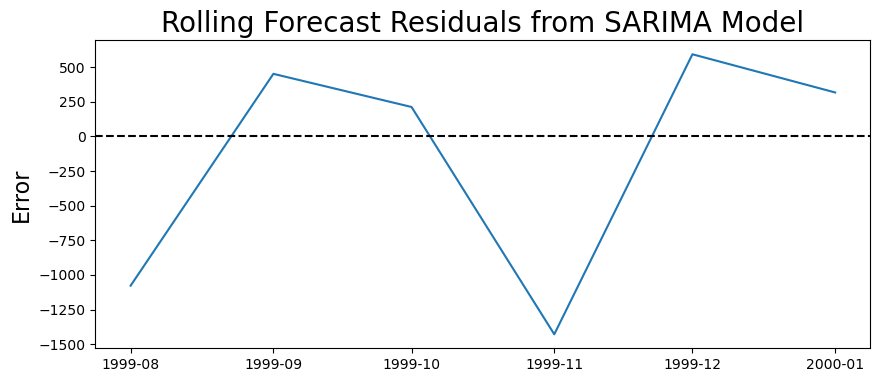

In [81]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)


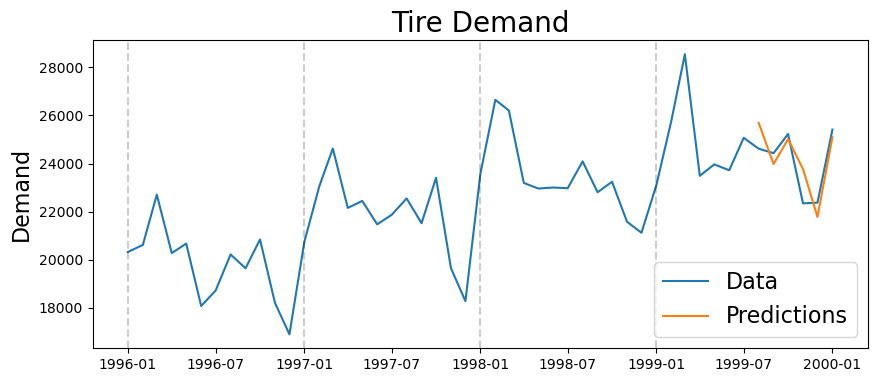

In [99]:
plt.figure(figsize=(10,4))

plt.plot(lim_tire_demand)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Tire Demand', fontsize=20)
plt.ylabel('Demand', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [90]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))


Mean Absolute Percent Error: 0.0289
Root Mean Squared Error: 806.5939271744393
